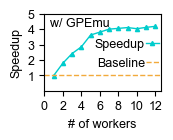

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=9

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize


fig = plt.gcf()

columns = ['worker', 'emulator_time', 'gpu_time']

# ssd, 24 workers, 8 v100
df = pd.read_csv('speedup.dat', sep='\t', names=columns)


def get_speedups(times, baseline):
	res = []
	for t in times:
		res.append(baseline/t)
	return res

emulator_baseline = 38.84659195
emulator_times = df['emulator_time'].tolist()
emulator_speedups = get_speedups(emulator_times, emulator_baseline)

gpu_baseline = 40.62999511
gpu_times = df['gpu_time'].tolist()
gpu_speedups = get_speedups(gpu_times, gpu_baseline)

workers = df['worker'].tolist()


plt.plot(workers, emulator_speedups, marker='^', markersize=3, linestyle='-', color='#00CCCC', label='Speedup', linewidth=1)

# plt.plot(workers, gpu_speedups, marker='o', markersize=10, linestyle='-', color='green', label='Speedup-GPEmu')



plt.axhline(y=1, color='#F2AA3C', linestyle='--', label='Baseline', linewidth=1)



plt.ylim(0,5)
# Adding labels and title
plt.xticks(range(0,14,2), fontsize=fontsize)
plt.yticks([1, 2, 3, 4, 5], fontsize=fontsize)
plt.xlabel('# of workers', fontsize=fontsize)
plt.ylabel('Speedup', fontsize=fontsize)
# plt.title('Training Time Speedup across\nTF-DS worker count',fontsize=fontsize, pad=20)

fig.set_size_inches(1.5, 1)
fig.set_dpi(100)
plt.legend(loc="center right", ncol=1, frameon=False, handletextpad=0.1, columnspacing=0.5, handlelength=1, markerfirst=False, bbox_to_anchor=(1.08, 0.48))
plt.annotate("w/ GPEmu", xy=(0.5, 4.2), xytext=(0.6, 4.2))
plt.savefig('tfds.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()